In [1]:
# import packacges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read normalized csv file 
# don't need to separate out binary variables. we just won't try to change the skew
dfx = pd.read_csv('../csv_files/p3minmax.csv', index_col=0)
dfx.head()

,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,0.458312,0.630418,0.622222,0.043128,0.471242,0.534307,0.617569,0.567375,0.462525,0.532463,0.478776,1.0,0
1,1.000000,0.384735,0.000000,0.021755,1.000000,0.545709,0.521720,0.489104,0.271483,0.667685,0.474754,0.0,1
2,0.327366,0.582011,0.000000,0.006144,0.406077,0.524798,0.622040,0.773408,1.000000,0.324790,0.514761,1.0,1
3,0.814322,0.578004,0.000000,0.007110,0.396940,0.268780,0.694834,0.769738,1.000000,0.386674,0.660248,1.0,1
4,0.286445,0.259982,0.280000,0.531813,0.453073,0.394649,0.424900,0.411101,0.420367,0.592646,0.504014,1.0,0


In [3]:
# examine skew for each column
# keep in mind that we do not need to fix the skew for C2 or C3p because they are binary 
dfx.skew()

C1     0.760422
C4    -0.303113
C6p    1.180845
C7     1.422741
C5p    0.715692
T4p   -0.069486
T3p   -0.569682
T5p    0.047763
S1p    0.539206
S2p    0.623121
S3p    0.418530
C2    -2.123926
C3p    0.147347
dtype: float64

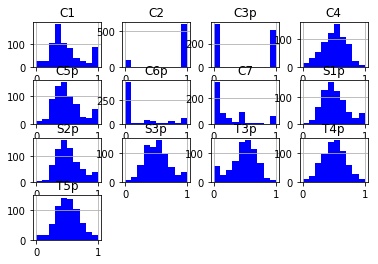

In [4]:
# examine distribution of variables before fixing skew
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Fixing Skewness of Columns**

In [5]:
dfx['C6p'] = np.sqrt(dfx['C6p'])
dfx['C6p'].skew()

0.7699143643344326

In [6]:
dfx['C7'] = np.sqrt(dfx['C7'])
dfx['C7'].skew()

0.6432305677833202

In [7]:
dfx['S2p'] = np.sqrt(dfx['S2p'])
dfx['S2p'].skew()

-0.1868288598814153

In [8]:
# rexamine skew of columns 
# skew should be between 0.5 and -0.5 but close enough to these values is also fine 
dfx.skew()

C1     0.760422
C4    -0.303113
C6p    0.769914
C7     0.643231
C5p    0.715692
T4p   -0.069486
T3p   -0.569682
T5p    0.047763
S1p    0.539206
S2p   -0.186829
S3p    0.418530
C2    -2.123926
C3p    0.147347
dtype: float64

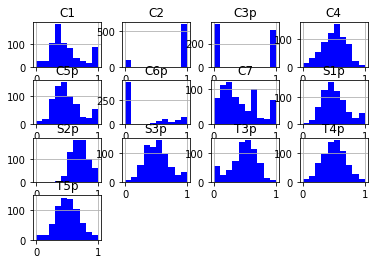

In [9]:
# examine distribution of columns after fixing skewness
# histograms should have an even distribution (or as close to it as possible)
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

In [10]:
# print out dfx 
dfx.head()

,C1,C4,C6p,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,0.458312,0.630418,0.788811,0.207673,0.471242,0.534307,0.617569,0.567375,0.462525,0.729701,0.478776,1.0,0
1,1.000000,0.384735,0.000000,0.147494,1.000000,0.545709,0.521720,0.489104,0.271483,0.817120,0.474754,0.0,1
2,0.327366,0.582011,0.000000,0.078383,0.406077,0.524798,0.622040,0.773408,1.000000,0.569904,0.514761,1.0,1
3,0.814322,0.578004,0.000000,0.084319,0.396940,0.268780,0.694834,0.769738,1.000000,0.621831,0.660248,1.0,1
4,0.286445,0.259982,0.529150,0.729255,0.453073,0.394649,0.424900,0.411101,0.420367,0.769835,0.504014,1.0,0


In [11]:
# read in dfy csv file
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,10.0,9.5,8.5,11.870000,9.0,0,1
1,8.0,10.0,8.0,7.250000,9.0,1,0
2,7.0,14.0,12.0,6.700000,13.0,1,0
3,11.5,16.0,14.0,12.390000,15.0,1,1
4,21.0,21.0,19.0,56.599998,20.0,0,1


In [12]:
# read in dfid csv file
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()                   

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [13]:
# concat dfid with dfy
df = pd.concat([dfid, dfy], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1


In [14]:
# concat dfx with df to get the full dataframe 
df = pd.concat([df, dfx], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,C7,C5p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.207673,0.471242,0.534307,0.617569,0.567375,0.462525,0.729701,0.478776,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,0.147494,1.000000,0.545709,0.521720,0.489104,0.271483,0.817120,0.474754,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,0.078383,0.406077,0.524798,0.622040,0.773408,1.000000,0.569904,0.514761,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,0.084319,0.396940,0.268780,0.694834,0.769738,1.000000,0.621831,0.660248,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,0.729255,0.453073,0.394649,0.424900,0.411101,0.420367,0.769835,0.504014,1.0,0


In [15]:
# export the full dataframe
df.to_csv('../csv_files/p3final.csv')

In [16]:
# export just the x variables 
dfx.to_csv('../csv_files/p3no_skewx.csv')